Nama : Aryo Adi Putro
Kelas : TI 3G
NIM : 2341720084
Absen : 07

# Praktikum 5 - Klasifikasi Citra Siang dan Malam

Pada praktikum ini dilakukan klasifikasi citra day/night menggunakan metode threshold sederhana dan SVM.

## Langkah 0 - Import Library

In [1]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set lokasi direktori gambar training dan testing.

In [3]:
train_dir = "/content/drive/MyDrive/Machine Learning - 2025/Jobsheet-11/images/training/"
test_dir = "/content/drive/MyDrive/Machine Learning - 2025/Jobsheet-11/images/test/"

## Langkah 1 - Load Data dan Visualisasikan

Fungsi berikut membaca seluruh gambar beserta labelnya ke dalam list.

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if not img is None:
                img_list.append((img, label))
    return img_list

Load data training.

In [5]:
train_img = load_dataset(train_dir)

Cek salah satu elemen data untuk memastikan format (img, label).

In [6]:
train_img[0]

(array([[[15, 14, 22],
         [25, 24, 32],
         [29, 27, 38],
         ...,
         [26, 20, 48],
         [21, 14, 45],
         [27, 20, 51]],
 
        [[16, 15, 23],
         [24, 23, 31],
         [28, 27, 35],
         ...,
         [29, 23, 51],
         [23, 16, 47],
         [28, 21, 52]],
 
        [[18, 17, 23],
         [24, 23, 29],
         [27, 26, 34],
         ...,
         [33, 27, 55],
         [26, 19, 50],
         [29, 22, 53]],
 
        ...,
 
        [[29, 27, 30],
         [27, 25, 28],
         [26, 21, 25],
         ...,
         [32, 29, 36],
         [26, 23, 30],
         [22, 19, 26]],
 
        [[31, 29, 32],
         [30, 28, 31],
         [31, 26, 30],
         ...,
         [33, 30, 37],
         [26, 23, 30],
         [22, 19, 26]],
 
        [[32, 30, 33],
         [30, 28, 31],
         [31, 26, 30],
         ...,
         [24, 21, 30],
         [28, 25, 34],
         [26, 23, 32]]], dtype=uint8),
 'night')

Cek ukuran gambar secara acak.

In [7]:
pick_random = np.random.randint(0, len(train_img))
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 102
(469, 640, 3)


Fungsi berikut digunakan untuk visualisasi gambar acak.

In [8]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'
    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Visualisasi gambar secara acak.

Shape	: (458, 800, 3)
Label	: night


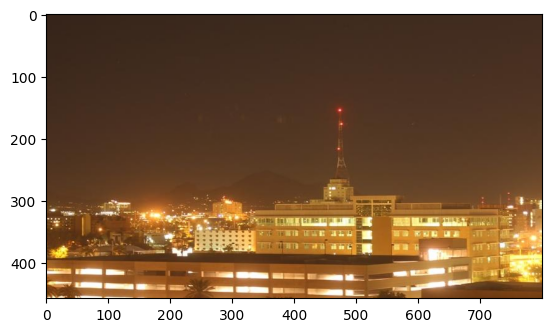

In [9]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

Resize gambar ke ukuran standar.

In [10]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

Encode label day=1 dan night=0.

In [11]:
def label_encoder(label):
    num_val = 0
    if(label == 'day'):
        num_val = 1
    return num_val

Gabungkan proses resize dan encoding seluruh data.

In [12]:
def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

Jalankan pra-pengolahan pada training dataset.

In [13]:
train_std_img_list = preprocess(train_img)

Cek ukuran gambar setelah pra-pengolahan.

In [14]:
pick_random = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 113
(600, 1100, 3)


Visualisasi hasil pra-pengolahan.

Shape	: (600, 1100, 3)
Label	: 0


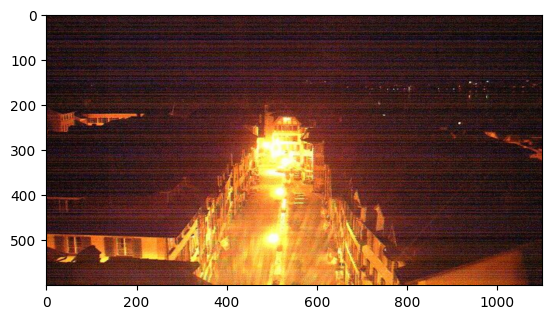

In [15]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur (Rata-rata Kecerahan)

Konversi gambar ke HSV dan hitung rata-rata channel Value.

In [16]:
def avg_brightness(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area
    return avg

Tes ekstraksi fitur pada gambar acak.

Image 80
Avg Brighness: 95.4667


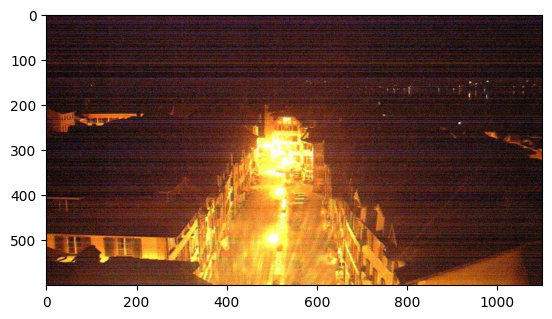

In [17]:
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)
print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Threshold

Fungsi berikut memprediksi label berdasarkan nilai ambang batas brightness.

In [18]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0
    if avg > threshold:
        pred = 1
    return pred

Uji prediksi dengan threshold pada data training.

Image 65
Actual label: 0
Predicted label: 0


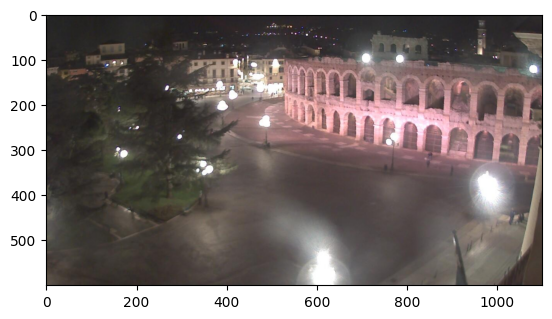

In [19]:
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual Model Threshold

Hitung akurasi berdasarkan jumlah prediksi yang benar.

In [20]:
def evaluate(img_list, threshold):
    miss_labels = []
    for file in img_list:
        img = file[0]
        label = file[1]
        pred_label = predict_label(img, threshold)
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    print(f'Accuracy: {accuracy:.4f}')

Evaluasi pada data training.

In [21]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Evaluasi pada data testing.

In [22]:
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Klasifikasi dengan SVM

### Langkah 4 Alternatif - Membuat Feature Vectors

Konversi fitur brightness menjadi tabel agar dapat dilatih menggunakan SVM.

In [23]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []
    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]
        avg_list.append(img_avg)
        labels.append(img_label)
    data = np.column_stack((avg_list, labels))
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])
    return df

Ekstraksi fitur training.

In [24]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,89.905798,0.0
1,8.305362,0.0
2,99.077967,0.0
3,13.972930,0.0
4,114.386045,0.0


Ekstraksi fitur testing.

In [25]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.300176,0.0
1,95.458935,0.0
2,13.228938,0.0
3,98.235594,0.0
4,21.454098,0.0


### Langkah 5 - Buat Model SVM

Pisahkan fitur dan label, kemudian latih model SVM.

In [26]:
from sklearn.svm import SVC
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]
model = SVC()
model.fit(X_train, y_train)

SVC()

### Langkah 6 - Evaluasi Model SVM

Hitung akurasi training dan testing.

In [27]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
